In [1]:
# Generate csv data (takes a really long time)

# import EXPERIMENTATION_TOOLKIT as experiments

# By default, new data is appended. When the sequence length is changes, old data should be deleted manually.
# experiments.run_experiments(3000, 2000, 'CORRECT_DATA.csv')

pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
Progress: 0th run. Estimated time left: 241.79 minutes
Progress: 1th run. Estimated time left: 197.29 minutes
Progress: 2th run. Estimated time left: 177.01 minutes
Progress: 3th run. Estimated time left: 176.09 minutes
Progress: 4th run. Estimated time left: 222.76 minutes
Progress: 5th run. Estimated time left: 247.76 minutes
Progress: 6th run. Estimated time left: 257.10 minutes
Progress: 7th run. Estimated time left: 207.06 minutes
Progress: 8th run. Estimated time left: 264.25 minutes
Progress: 9th run. Estimated time left: 260.30 minutes
Progress: 10th run. Estimated time left: 267.94 minutes
Progress: 11th run. Estimated time left: 216.94 minutes
Progress: 12th run. Estimated time left: 198.27 minutes
Progress: 13th run. Estimated time left: 177.28 minutes
Progress: 14th run. Estimated time left: 249.71 minutes
Progress: 15th run. Estimated time left: 225.04 minutes
P

In [3]:
# from sklearn.model_selection import train_test_split

# Splitting the Data
# input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [1]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Dropout
from keras.regularizers import l2

# Defining constants we are going to use
n_input = 1500  # HALF OF THE WHOLE SEQUENCE LENGTH
n_output = 1500  # HALF OF THE WHOLE SEQUENCE LENGTH
n_features = 2 # We can add grass or not

# Define the model
model = Sequential()

# Encoder part
model.add(LSTM(150, activation='tanh', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(32, activation='tanh', return_sequences=False))

# RepeatVector is used as a bridge between the encoder and decoder parts
model.add(RepeatVector(n_output))


# Decoder part
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150, activation='tanh', return_sequences=True))

# Densely connected output layer
model.add(TimeDistributed(Dense(n_features)))

# Compiling the model
optimizer = Adam(clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mse')

2024-07-02 16:02:13.189836: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 16:02:13.434100: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 16:02:14.062006: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 16:02:16.481968: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/stasieniec/anaconda3/envs/ml01/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model in

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import ast
import EXPERIMENTATION_TOOLKIT as experiments


# Load and preprocess the data
file_path = 'data/data1.csv'  # replace with your file path
sequences = experiments.load_and_parse_data(file_path)
inputs, targets = experiments.split_sequences(sequences, 3000)

print(inputs)
print(targets)


# First, split the data into train+validation and test sets
input_train_val, input_test, target_train_val, target_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# Then, split the train+validation set into separate train and validation sets
input_train, input_val, target_train, target_val = train_test_split(input_train_val, target_train_val, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2, so 20% of the data will be for validation


pygame 2.5.2 (SDL 2.28.2, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html
Discarded 0 sequences
[[[  3  48]
  [  4  45]
  [  4  45]
  ...
  [  0  24]
  [  0  24]
  [  0  24]]

 [[ 48  44]
  [ 46  46]
  [ 46  46]
  ...
  [  6  81]
  [  6  81]
  [  6  81]]

 [[ 30  14]
  [ 30  14]
  [ 30  14]
  ...
  [ 18  50]
  [ 18  50]
  [ 20  49]]

 ...

 [[ 50  25]
  [ 49  26]
  [ 49  26]
  ...
  [  9  65]
  [  9  65]
  [  9  65]]

 [[ 39  19]
  [ 38  20]
  [ 44  19]
  ...
  [ 22  69]
  [ 22  69]
  [ 22  69]]

 [[ 44  36]
  [ 50  33]
  [ 50  33]
  ...
  [  7 106]
  [  7 106]
  [  7 106]]]
[[[  0  24]
  [  0  23]
  [  0  23]
  ...
  [  0  12]
  [  0  12]
  [  0  12]]

 [[  6  74]
  [  6  74]
  [  6  74]
  ...
  [  5  38]
  [  5  38]
  [  5  38]]

 [[ 20  49]
  [ 20  49]
  [ 20  49]
  ...
  [ 12  52]
  [ 12  52]
  [ 15  50]]

 ...

 [[  9  65]
  [  9  65]
  [  8  66]
  ...
  [  0  36]
  [  0  36]
  [  0  36]]

 [[ 22  69]
  [ 21  70]
  [ 25  67]
  ...
  [ 12  47

In [4]:
history1 = model.fit(input_train, target_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(input_val, target_val), 
                    verbose=1)


Epoch 1/5


In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
# model.fit(input_train, target_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 761.1994
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 670.7342
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 584.9140
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 500.6179
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 436.3543


In [7]:
loss = model.evaluate(input_test, target_test, verbose=0)
print('Model loss:', loss)
model.save('model.h5')

Model loss: 432.5062561035156


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


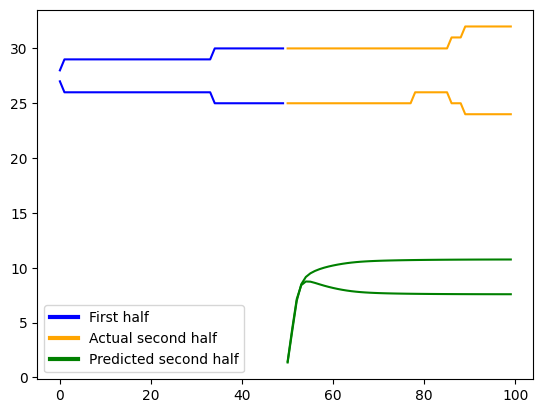

In [9]:
# Assuming input_test and target_test are correctly shaped as (num_samples, n_input, n_features)
# Pick a random index from the test dataset
import random
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
idx = random.randint(0, len(input_test) - 1)

# Get the corresponding sequences
input_seq = input_test[idx]
target_seq = target_test[idx]

# Reshape the input sequence for prediction if necessary
if input_seq.ndim < 3:
    input_seq = input_seq.reshape(1, n_input, n_features)

# Make a prediction
predicted_seq = model.predict(input_seq)[0]

# Ensure predicted sequence has the same shape as target sequence
predicted_seq = predicted_seq.reshape(target_seq.shape)

# Create a plot
fig, ax = plt.subplots()

# Use different colors for the first half, actual second half, and predicted second half
colors = ['blue', 'orange', 'green']

# Plot the first half of the sequence, the second half of the sequence, and the prediction
for i in range(n_features):  # Assuming n_features is the number of variables
    ax.plot(range(0, n_input), input_seq[0, :, i], color=colors[0])
    ax.plot(range(n_input, 2*n_input), target_seq[:, i], color=colors[1])
    ax.plot(range(n_input, 2*n_input), predicted_seq[:, i], color=colors[2])

# Set up legend
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['First half', 'Actual second half', 'Predicted second half']
ax.legend(lines, labels)

# Save the plot to a file
plt.savefig('prediction_comparison_plot.png')

plt.show()

1/1 [==============================] - 0s 36ms/step


ValueError: x and y must have same first dimension, but have shapes (50,) and (1, 2)

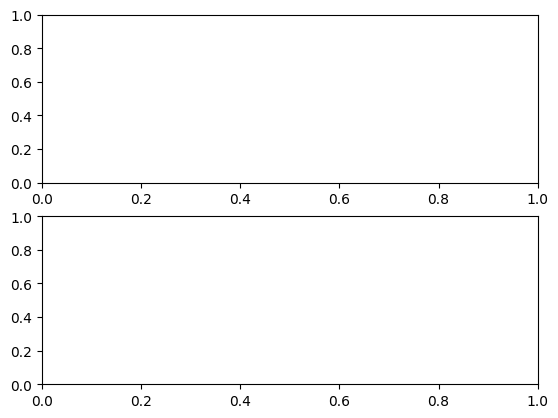

In [16]:
import matplotlib.pyplot as plt
import random

# pick a random index from the test dataset
idx = random.randint(0, len(input_test) - 1)

# get the corresponding sequences
input_seq = input_test[idx]
target_seq = target_test[idx]

# reshape the input sequence and make a prediction
predicted_seq = model.predict(input_seq.reshape(1, n_input, n_features))[0]
input_seq = input_seq.reshape(1, n_input, n_features)
target_seq = target_seq.reshape(1, n_output, n_features)




# create two subplots, one for each variable
fig, axs = plt.subplots(2)

# use different colors for the first half, actual second half and predicted second half
colors = ['blue', 'orange', 'green']

for i in range(2):
    # plot the first half of the sequence
    axs[i].plot(range(0, n_input), input_seq[:, i], color=colors[0], label='First half')
    # plot the second half of the sequence
    axs[i].plot(range(n_input, 2*n_input), target_seq[:, i], color=colors[1], label='Actual second half')
    # plot the model's prediction for the second half of the sequence
    axs[i].plot(range(n_input, 2*n_input), predicted_seq[:, i], color=colors[2], label='Predicted second half')
    axs[i].legend()

plt.show()

In [11]:
# Assuming model.predict outputs (100, 2) and you need (1, 100, 2)
predicted_seq = model.predict(input_seq)[0]

# Print shapes for debugging
print("Input sequence shape:", input_seq.shape)
print("Target sequence shape:", target_seq.shape)
print("Reshaped predicted sequence shape:", predicted_seq.shape)

# Ensure the shapes are what you expect
assert input_seq.shape == (1, 100, 2), "Input shape mismatch"
assert predicted_seq.shape == (1, 100, 2), "Prediction shape mismatch"

# Update plotting code to use reshaped predicted_seq
# Example plotting adjustment
fig, ax = plt.subplots()
ax.plot(range(100), input_seq[0, :, 0], label='Input Feature 1')
ax.plot(range(100), target_seq[0, :, 0], label='Target Feature 1')
ax.plot(range(100), predicted_seq[0, :, 0], label='Predicted Feature 1')
ax.legend()
plt.show()

1/1 [==============================] - 0s 37ms/step
Input sequence shape: (1, 50, 2)
Target sequence shape: (1, 50, 2)
Reshaped predicted sequence shape: (50, 2)


AssertionError: Input shape mismatch

1/1 [==============================] - 0s 31ms/step


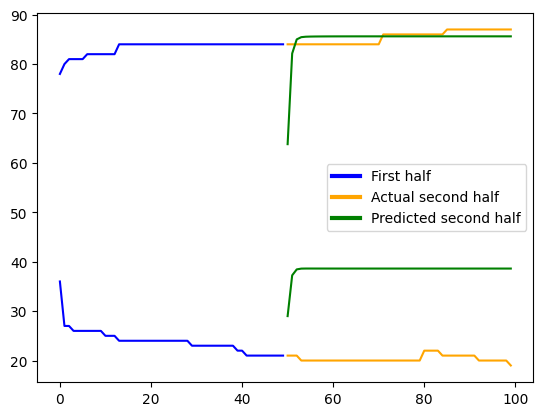

In [18]:
from matplotlib.lines import Line2D

# Assuming input_test and target_test are correctly shaped as (num_samples, n_input, n_features)
# Pick a random index from the test dataset
idx = random.randint(0, len(input_test) - 1)

# Get the corresponding sequences
input_seq = input_test[idx]
target_seq = target_test[idx]

# Reshape the input sequence for prediction if necessary
if input_seq.ndim < 3:
    input_seq = input_seq.reshape(1, n_input, n_features)

# Make a prediction
predicted_seq = model.predict(input_seq)[0]

# Create a plot
fig, ax = plt.subplots()

# Use different colors for the first half, actual second half, and predicted second half
colors = ['blue', 'orange', 'green']

# Plot the first half of the sequence, the second half of the sequence, and the prediction
for i in range(2):  # Only predict 2 variables
    ax.plot(range(0, n_input), input_seq[0, :, i], color=colors[0])
    ax.plot(range(n_input, 2*n_input), target_seq[:, i], color=colors[1])
    ax.plot(range(n_input, 2*n_input), predicted_seq[:, i], color=colors[2])

# Set up legend
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['First half', 'Actual second half', 'Predicted second half']
ax.legend(lines, labels)

plt.show()

1/1 [==============================] - 0s 55ms/step


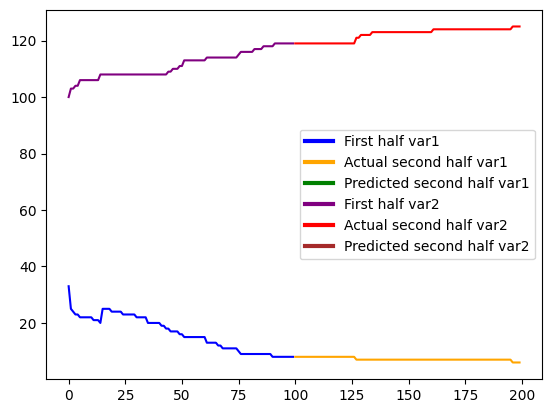

In [29]:
from matplotlib.lines import Line2D

# Assuming input_test and target_test are correctly shaped as (num_samples, n_input, n_features)
# Pick a random index from the test dataset
idx = random.randint(0, len(input_test) - 1)

# Get the corresponding sequences
input_seq = input_test[idx]
target_seq = target_test[idx]

# Reshape the input sequence for prediction if necessary
if input_seq.ndim < 3:
    input_seq = input_seq.reshape(1, n_input, n_features)

# Make a prediction
predicted_seq = model.predict(input_seq)[0]

# Create a plot
fig, ax = plt.subplots()

# Use different colors for the first half, actual second half, and predicted second half
# Define separate color sets for each variable
colors_var1 = ['blue', 'orange', 'green']  # Colors for the first variable
colors_var2 = ['purple', 'red', 'brown']   # Colors for the second variable

# Plot the first half of the sequence, the second half of the sequence, and the prediction
for i in range(2):  # Only predict 2 variables
    colors = colors_var1 if i == 0 else colors_var2
    ax.plot(range(0, n_input), input_seq[0, :, i], color=colors[0])
    ax.plot(range(n_input, 2*n_input), target_seq[:, i], color=colors[1])
    ax.plot(range(n_input, 2*n_input), predicted_seq[:, i], color=colors[2])

# Set up legend
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors_var1 + colors_var2]
labels = ['First half var1', 'Actual second half var1', 'Predicted second half var1',
          'First half var2', 'Actual second half var2', 'Predicted second half var2']
ax.legend(lines, labels)

plt.show()